In [27]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

AUTOTUNE = tf.data.experimental.AUTOTUNE
img_w = 192
img_h = 192

In [28]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_w, img_h])
    image /= 255
    return image

def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image)

In [29]:
with open('data/img_celeba/list_eval_partition.txt') as f:
            filenames = f.read().splitlines()
for i in range(len(filenames)):
    filenames[i] = "data/img_celeba/" + filenames[i].split(" ")[0]
print(filenames[0])

data/img_celeba/000001.jpg


In [30]:
path_ds = tf.data.Dataset.from_tensor_slices(filenames)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [31]:
print(image_ds)

<DatasetV1Adapter shapes: (192, 192, 3), types: tf.float32>


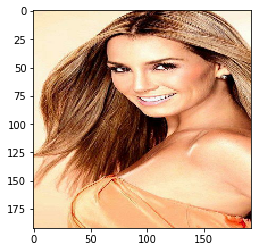

In [32]:
sess = tf.Session()
outputs = image_ds.make_one_shot_iterator().get_next()
plt.imshow(sess.run(outputs))
plt.show()

In [33]:
delta_h = 64
delta_w = 64

In [34]:
height = tf.constant(64)
width = tf.constant(64)
vertical_margin = 6
horizontal_margin = 6
lim_top = img_h - img_h // vertical_margin - height  
lim_left = img_w - img_w // horizontal_margin - width
t = tf.random_uniform([], minval=vertical_margin, maxval=lim_top, dtype=tf.int32)
l = tf.random_uniform([], minval=horizontal_margin, maxval=lim_left, dtype=tf.int32)

bbox = (t, l, height, width)
bbox = sess.run(bbox)
print(bbox)


(7, 39, 64, 64)


In [35]:
mask = np.ones((img_h, img_w, 3), np.float32)
h = np.random.randint(delta_h//2+1)
w = np.random.randint(delta_w//2+1)
print(h)
mask[bbox[0]+h:bbox[0]+bbox[2]-h,
     bbox[1]+w:bbox[1]+bbox[3]-w, :] = 0.
#print(mask)
masked = image_ds.map(lambda x: tf.multiply(x, mask))
outputs = masked.make_one_shot_iterator().get_next()
plt.imshow(sess.run(outputs))
plt.show()

20


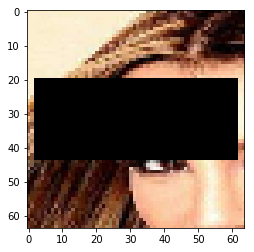

In [36]:
cropped = masked.map(lambda x: tf.image.crop_to_bounding_box(x, bbox[0], bbox[1], bbox[2], bbox[3]))

outputs = cropped.make_one_shot_iterator().get_next()
plt.imshow(sess.run(outputs))
plt.show()

In [ ]:
sess.close()